Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Matrix multiplication involves multiplying elements from the rows of the first matrix with the corresponding elements from the columns of the second matrix and summing up these products to obtain the elements of the resulting matrix.

After multiplying a(n,k) and b(k,m), we get c(n,m).
Here,c[i][j] = a[i][0]*b[0][j] + a[i][1]*b[1][j] + ... + a[i][k]*b[k][j]
To calculate each element of the matrix c, we perform k multiplication and (k-1) addition operations. 
Also, the number of elements in the matrix c = n*m
Therefore, 
1. the total no. of multiplications = k*n*m
2. the total no. of additions = (k - 1)*n*m

Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [43]:
import time
import numpy as np
matrix1= [[1,2],[6,7],[4,5]]
matrix2= [[4,7,3,2],[1,5,4,3]]
matrix3=[[0,0,0,0],[0,0,0,0],[0,0,0,0]]

start_time1= time.time()
for i in range(len(matrix1)):
  for k in range(len(matrix2[0])):
    for j in range(len(matrix2)):

      matrix3[i][k]= matrix3[i][k] + matrix1[i][j]*matrix2[j][k]

print(matrix3)
end_time1= time.time()

print("time taken using list=", end_time1 - start_time1)

matrix_1 = np.array(matrix1)
matrix_2= np.array(matrix2)

start_time2= time.time()
matrix_3= np.dot(matrix_1, matrix_2)
end_time2= time.time()

print("time taken using numpy=", end_time2 - start_time2)

print("Time taken by numpy is less than the time taken by the method of list of lists")
print("Numpy is faster because in the method of list of lists, three nested for loops were used which imply a cubic time complexity, resulting in increased computatioanl time, whereas NumPy's optimized and vectorized operations lead to a more efficient implementation with a lower time complexity.")


[[6, 17, 11, 8], [31, 77, 46, 33], [21, 53, 32, 23]]
time taken using list= 0.0
time taken using numpy= 0.0
Time taken by numpy is less than the time taken by the method of list of lists
Numpy is faster because in the method of list of lists, three nested for loops were used which imply a cubic time complexity, resulting in increased computatioanl time, whereas NumPy's optimized and vectorized operations lead to a more efficient implementation with a lower time complexity.


Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [44]:
import numpy as np
import time

def simple_median(arr):
    n = len(arr)
    for i in range(n // 2):
        maximum = max(arr)
        arr.remove(maximum)

    if n % 2 == 1:
        return max(arr)
    else:
        return (max(arr) + maximum) / 2


def better_median(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 ==1 :
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2

arr= [12,45,32,45,78,31]

# Compare performance
start_time = time.time()
result_linear = simple_median(arr.copy())
end_time = time.time()

print("Linear approach result:",result_linear)
print("Linear approach time:",end_time - start_time,"seconds")

start_time = time.time()
result_sorting = better_median(arr.copy())
end_time = time.time()

print("Sorting approach result:",result_sorting)
print("Sorting approach time: ",end_time - start_time," seconds")

start_time = time.time()
result_numpy = np.median(arr.copy())
end_time = time.time()

print("NumPy median result:", result_numpy)
print("NumPy median time: " ,end_time - start_time,"seconds")


        



Linear approach result: 38.5
Linear approach time: 0.0 seconds
Sorting approach result: 38.5
Sorting approach time:  0.0  seconds
NumPy median result: 38.5
NumPy median time:  0.0 seconds


Q4. What is the gradient of the following function with respect to x and y?
$$x^2y + y^3sin(x)$$

The gradient with respect to x is:$$2xy + y^3cos(x)$$
The gradient with respect to y is:$$x^2 + 3y^2sin(x)$$

Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [45]:
import jax
import jax.numpy as jnp

def f(x, y):
    return (x**2)*y+(y**3)*jnp.sin(x)

gradient=jax.grad(f, argnums=(0, 1))

x=2.0
y=3.0

analytical= (2*x*y+y**3*jnp.cos(x),x**2+3*y*2*jnp.sin(x))

jaxgradient=gradient(x,y)

print(analytical)
print(jaxgradient)

AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [46]:
from sympy import *

x = Symbol('x')
y = Symbol('y')

f = x**2*y + y**3*sin(x)

derivative_f1 = f.diff(x)

derivative_f1


2*x*y + y**3*cos(x)

In [47]:
from sympy import *

x = Symbol('x')
y = Symbol('y')

f = x**2*y + y**3*sin(x)

derivative_f2 = f.diff(y)
derivative_f2

x**2 + 3*y**2*sin(x)

Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2

In [21]:
dict1= {2022:
            {"Branch 1":
                {"Roll no.":1,"Name": "X", "Marks":{"Maths":99, "English":97}} ,
             "Branch 2":
                {"Roll no.": 2,"Name": "Y", "Marks": { "Maths": 95, "English": 98}}},
        2023:
            { "Branch 1":
                {"Roll no.":1,"Name": "A", "Marks":{"Maths":96, "English":85}},
              "Branch 2":
                {"Roll no.":1,"Name": "B", "Marks":{"Maths":100, "English":92}}},
        2024: {"Branch 1":{}, "Branch 2":{}},
        2025: {"Branch 1":{}, "Branch 2":{}}}
print(dict1)

{2022: {'Branch 1': {'Roll no.': 1, 'Name': 'X', 'Marks': {'Maths': 99, 'English': 97}}, 'Branch 2': {'Roll no.': 2, 'Name': 'Y', 'Marks': {'Maths': 95, 'English': 98}}}, 2023: {'Branch 1': {'Roll no.': 1, 'Name': 'A', 'Marks': {'Maths': 96, 'English': 85}}, 'Branch 2': {'Roll no.': 1, 'Name': 'B', 'Marks': {'Maths': 100, 'English': 92}}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [48]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, branch):
        self.students = []
        self.branch = branch

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

def print_database(database):
    for year in database:
        print(year.year)
        for branch in year.branches:
            print("\t", branch.branch)
            for student in branch.students:
                print("\t\tRoll Number:",student.roll_number)
                print("\t\tName:", student.name)
                print("\t\tMarks:",student.marks)

student1 = Student(1, 'N', {'Maths': 100, 'English': 70})

branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(student1)

branch2_2022 = Branch("Branch 2")

year_2022 = Year(2022)
year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

branch1_2023 = Branch("Branch 1")
branch2_2023 = Branch("Branch 2")

year_2023 = Year(2023)
year_2023.add_branch(branch1_2023)
year_2023.add_branch(branch2_2023)

branch1_2024 = Branch("Branch 1")
branch2_2024 = Branch("Branch 2")

year_2024 = Year(2024)
year_2024.add_branch(branch1_2024)
year_2024.add_branch(branch2_2024)

branch1_2025 = Branch("Branch 1")
branch2_2025 = Branch("Branch 2")

year_2025 = Year(2025)
year_2025.add_branch(branch1_2025)
year_2025.add_branch(branch2_2025)

database = [year_2022, year_2023, year_2024, year_2025]

print_database(database)


2022
	 Branch 1
		Roll Number: 1
		Name: N
		Marks: {'Maths': 100, 'English': 70}
	 Branch 2
2023
	 Branch 1
	 Branch 2
2024
	 Branch 1
	 Branch 2
2025
	 Branch 1
	 Branch 2


Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
$$y = x$$
$$y = x^2$$
$$y = x^3/100$$ 
$$y = sin(x)$$ 
$$y = sin(x)/x$$ 
$$y = log(x)$$
$$y = e^x$$

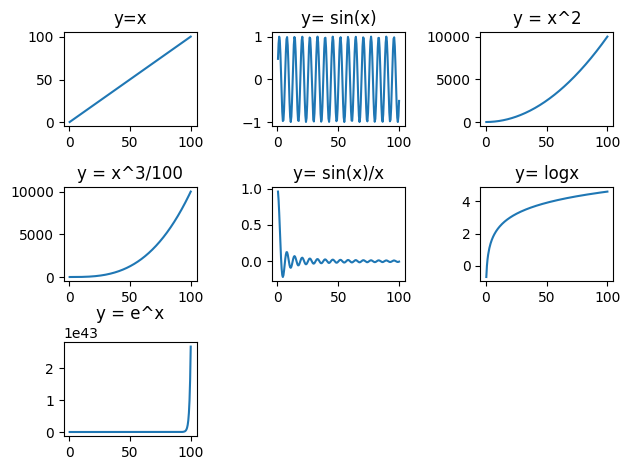

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y_values1 = x
y_values2= np.sin(x)
y_values3= x**2
y_values4= (x**3)/100
y_values5= np.sin(x)/x
y_values6= np.log(x)
y_values7= np.exp(x)

plt.subplot(3,3,1)
plt.plot(x,y_values1)
plt.title("y=x")

plt.subplot(3,3,2)
plt.plot(x, y_values2)
plt.title("y= sin(x)")

plt.subplot(3,3,3)
plt.plot(x, y_values3)
plt.title("y = x^2")

plt.subplot(3,3,4)
plt.plot(x, y_values4)
plt.title( "y = x^3/100")

plt.subplot(3,3,5)
plt.plot(x, y_values5)
plt.title( "y= sin(x)/x")

plt.subplot(3,3,6)
plt.plot(x, y_values6)
plt.title("y= logx")

plt.subplot(3,3,7)
plt.plot(x,y_values7)
plt.title("y = e^x")

plt.tight_layout()

Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [50]:
import numpy as np
import pandas as pd

np.random.seed(50)

matrix= np.random.uniform(1,2,(20,5))
df1= pd.DataFrame( matrix, columns=["a","b","c","d","e"])
col_highest_std = df1.std().idxmax()
row_lowest_mean = df1.mean(axis=1).idxmin()
print("Column with highest standard deviation = ",col_highest_std)
print("Row with lowest mean = ",row_lowest_mean)

Column with highest standard deviation =  e
Row with lowest mean =  5


Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [51]:
import numpy as np
import pandas as pd

np.random.seed(50)

matrix= np.random.uniform(1,2,(20,5))
df1= pd.DataFrame( matrix, columns=["a","b","c","d","e"])
df1["f"] = df1["a"] + df1["b"] + df1["c"] + df1["d"] + df1["e"]
df1['g'] = np.where(df1['f'] < 8, 'LT8', 'GT8')

df2= df1[df1["g"]== "LT8"]
rows_num= df2.shape[0]
print("number of rows where the value in the column “g” is “LT8”: ",rows_num)

df3= df1[df1["g"]=="GT8"]

std1= df2["f"].std()
std2= df3["f"].std()

print("standard deviation with values LT8:",std1)
print("standard deviation with values GT8:",std2)

number of rows where the value in the column “g” is “LT8”:  13
standard deviation with values LT8: 0.46764363892204025
standard deviation with values GT8: 0.2419223402331715


Q12. Write a small piece of code to explain broadcasting in numpy.



In [52]:
#We have a scalar value (7) and an array (arr1). When we perform a multiplication operation, the scalar value is broadcasted to each element of the array.
import numpy as np
arr1= np.array([2,5,7,9])
x=7
arr2= x*arr1
print(arr2)

[14 35 49 63]


Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [53]:
import numpy as np


def idx_min(arr):

  min_value = arr[0]
  min_index = 0

  for i in range(len(arr1)-1):
    if arr[i]< min_value:
      min_value= arr[i]
      min_index= i
  return min_index

arr1= [3,7,4,1,2,5,6,9,3]
min_index= idx_min(arr1)
print("index of the minimum element using function=",min_index)
min_index1= np.argmin(arr1)
print("index of minimum element using argmin=",min_index1)

if min_index==min_index1:
  print("The results match")
else:
  print("The results do not match")

index of the minimum element using function= 3
index of minimum element using argmin= 3
The results match
